In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Downloading the dataset

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228827136/228813984 [==============================] - 3s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/18245124970_e68fd3f3c3.jpg'),
 PosixPath('datasets/flower_photos/tulips/14110615113_bd7b3fcb84.jpg'),
 PosixPath('datasets/flower_photos/tulips/133858239_3eaa8a91fd_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5687705933_55a8c2dbac.jpg'),
 PosixPath('datasets/flower_photos/tulips/12517756805_56b74be742.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
list(data_dir.glob('roses/*'))[:6]

[PosixPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 PosixPath('datasets/flower_photos/roses/22506717337_0fd63e53e9.jpg'),
 PosixPath('datasets/flower_photos/roses/6363951285_a802238d4e.jpg'),
 PosixPath('datasets/flower_photos/roses/756943228_e15a7b2318.jpg'),
 PosixPath('datasets/flower_photos/roses/15274443248_76b9f3eb24.jpg'),
 PosixPath('datasets/flower_photos/roses/509239741_28e2cfe492_m.jpg')]

In [8]:
list(data_dir.glob('daisy/*'))[:6]

[PosixPath('datasets/flower_photos/daisy/6950173662_5e9473003e_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/17027891179_3edc08f4f6.jpg'),
 PosixPath('datasets/flower_photos/daisy/3661613900_b15ca1d35d_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/5110107234_12ddc0206b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/5973491805_556bba93cc.jpg'),
 PosixPath('datasets/flower_photos/daisy/4581199679_867652c3f1_n.jpg')]

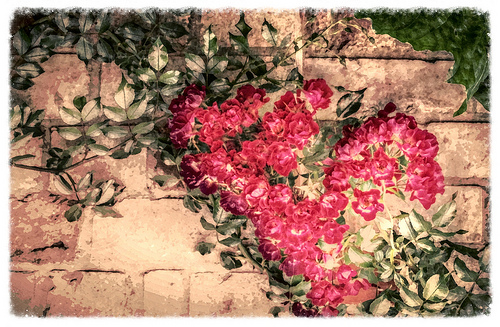

In [11]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

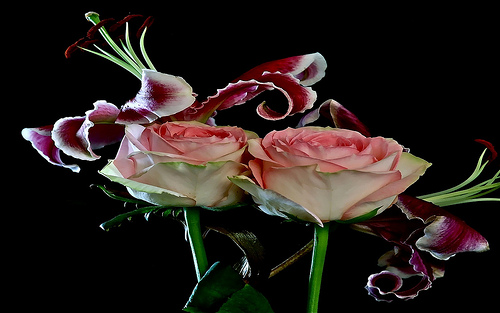

In [12]:
PIL.Image.open(str(roses[2]))

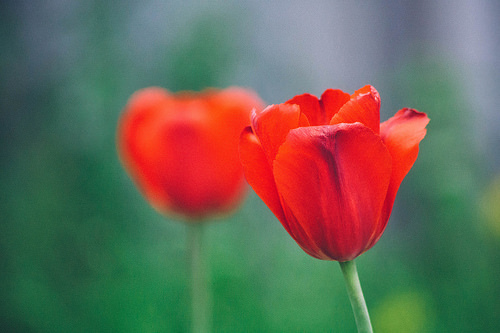

In [13]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

### Read flowers images from disk into numpy array using opencv

In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [16]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [17]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')

In [18]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [19]:
img.shape

(240, 180, 3)

In [20]:
X, y = [], []
for flower_names, images in flowers_images_dict.items():
    for items in images:
        img = cv2.imread(str(items))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_names])

In [21]:
y[:5]

[0, 0, 0, 0, 0]

In [22]:
X[0]

array([[[  3,   0, 148],
        [  0,   3, 139],
        [  0,   3, 162],
        ...,
        [  2,   1,  16],
        [  0,   0,  15],
        [  0,   0,  11]],

       [[  0,   0, 148],
        [  0,   1, 147],
        [  4,   2, 172],
        ...,
        [  0,   0,  13],
        [  0,   0,  13],
        [  0,   0,  11]],

       [[  2,   3, 151],
        [  1,   2, 152],
        [  6,   0, 172],
        ...,
        [  0,   0,  10],
        [  0,   0,  10],
        [  0,   0,  10]],

       ...,

       [[  4,   0, 159],
        [  1,   0, 139],
        [  0,   1, 124],
        ...,
        [  0,   3, 198],
        [  0,   2, 217],
        [  2,   0, 241]],

       [[  6,   2, 176],
        [  3,   1, 166],
        [  0,   2, 150],
        ...,
        [  0,   3, 195],
        [  0,   1, 214],
        [  3,   0, 238]],

       [[  0,   2, 174],
        [  0,   2, 173],
        [  0,   2, 171],
        ...,
        [  0,   2, 191],
        [  0,   0, 210],
        [  2,   0, 234]]

In [23]:
X = np.array(X)
y = np.array(y)

### Train test spit

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing: scale images

In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 34s 41ms/step - loss: 1.3445 - accuracy: 0.4350
Epoch 2/10
86/86 [==============================] - 4s 41ms/step - loss: 1.0211 - accuracy: 0.5988
Epoch 3/10
86/86 [==============================] - 4s 42ms/step - loss: 0.8407 - accuracy: 0.6824
Epoch 4/10
86/86 [==============================] - 4s 41ms/step - loss: 0.6370 - accuracy: 0.7624
Epoch 5/10
86/86 [==============================] - 4s 41ms/step - loss: 0.4094 - accuracy: 0.8601
Epoch 6/10
86/86 [==============================] - 4s 42ms/step - loss: 0.2446 - accuracy: 0.9197
Epoch 7/10
86/86 [==============================] - 4s 42ms/step - loss: 0.1226 - accuracy: 0.9680
Epoch 8/10
86/86 [==============================] - 4s 42ms/step - loss: 0.0991 - accuracy: 0.9735
Epoch 9/10
86/86 [==============================] - 4s 42ms/step - loss: 0.0654 - accuracy: 0.9840
Epoch 10/10
86/86 [==============================] - 4s 41ms/step - loss: 0.0400 - accuracy: 0.9902


In [27]:
print("hello")

hello


In [28]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 27ms/step - loss: 1.8738 - accuracy: 0.6166


[1.8738058805465698, 0.6165577173233032]


**Predictions**

In [29]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -1.8783982 ,   8.89109   ,  12.213328  , -13.059571  ,
         -8.702583  ],
       [  4.694061  ,  -0.16281871,   0.9023223 ,  -2.9340756 ,
          2.9251132 ],
       [  0.31131265,   0.22728278,   2.4412184 ,  -1.5382435 ,
         -0.08849642],
       ...,
       [ -5.3291974 ,  -2.7881122 ,  -1.2542537 ,   7.7258387 ,
         -0.8838089 ],
       [ 12.093043  ,   0.76832587,  -1.8357383 ,  -4.283768  ,
          5.9119606 ],
       [ -3.4345114 , -15.795218  ,   1.1614609 ,   6.0291834 ,
          0.60848916]], dtype=float32)

In [36]:
score = tf.nn.softmax(predictions[2])

In [37]:
np.argmax(score)

2

In [38]:
y_test[2]

2

**Improve Test Accuracy Using Data Augmentation**

In [52]:
img_height = 180
img_width = 180
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

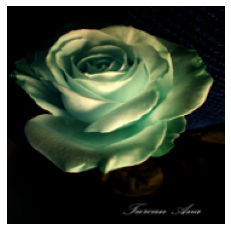

In [43]:
plt.axis('off')
plt.imshow(X[5])

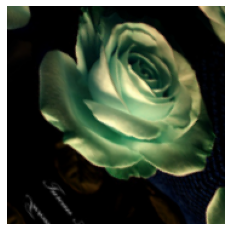

In [49]:
plt.axis('off')
plt.imshow(data_augmentation(X[5]))

In [53]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 5s 49ms/step - loss: 1.4160 - accuracy: 0.3914
Epoch 2/30
86/86 [==============================] - 4s 48ms/step - loss: 1.0943 - accuracy: 0.5509
Epoch 3/30
86/86 [==============================] - 4s 47ms/step - loss: 0.9932 - accuracy: 0.6185
Epoch 4/30
86/86 [==============================] - 4s 48ms/step - loss: 0.9326 - accuracy: 0.6352
Epoch 5/30
86/86 [==============================] - 4s 48ms/step - loss: 0.8568 - accuracy: 0.6613
Epoch 6/30
86/86 [==============================] - 4s 48ms/step - loss: 0.8268 - accuracy: 0.6791
Epoch 7/30
86/86 [==============================] - 4s 47ms/step - loss: 0.7832 - accuracy: 0.6897
Epoch 8/30
86/86 [==============================] - 4s 48ms/step - loss: 0.7379 - accuracy: 0.7086
Epoch 9/30
86/86 [==============================] - 4s 48ms/step - loss: 0.7111 - accuracy: 0.7293
Epoch 10/30
86/86 [==============================] - 4s 48ms/step - loss: 0.6637 - accuracy: 0.7616
Epoch 11/

In [54]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 22ms/step - loss: 0.8642 - accuracy: 0.7277


[0.8642443418502808, 0.727668821811676]